# Step 1: Data Collection
We'll start by fetching historical stock price data for the Nifty 50 index using the yfinance library.

In [2]:
pip install yfinance

     --------------------------------------- 73.5/73.5 kB 30.0 kB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 322.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 64.9/64.9 kB 318.0 kB/s eta 0:00:00
     ------------------------------------ 112.2/112.2 kB 592.6 kB/s eta 0:00:00
     ------------------------------------ 505.5/505.5 kB 660.3 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138680 sha256=6b00e3d505dd3f30e1ceaf6ffbf0e7e8b54e5a2dcef8c843750f767d0f676b5e
  Stored in directory: c:\users\anoushka singh\appdata\local\pip\cache\wheels\95\bd\4e\15d1893c245357e4d2353e77456c0be

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd

In [26]:
# Download historical stock price data for Nifty 50nifty50 = yf.Ticker("^NSEI")
data = nifty50.history(start="2010-01-01", end="2023-01-01")

In [5]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,5200.899902,5238.450195,5167.100098,5232.200195,0,0.0,0.0
2010-01-05 00:00:00+05:30,5277.149902,5288.350098,5242.399902,5277.899902,0,0.0,0.0
2010-01-06 00:00:00+05:30,5278.149902,5310.850098,5260.049805,5281.799805,0,0.0,0.0
2010-01-07 00:00:00+05:30,5281.799805,5302.549805,5244.750000,5263.100098,0,0.0,0.0
2010-01-08 00:00:00+05:30,5264.250000,5276.750000,5234.700195,5244.750000,0,0.0,0.0


# Step 2: Data Preparation
Split the data into training, validation, and test sets. We'll handle missing values and normalize the data if necessary.

In [6]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

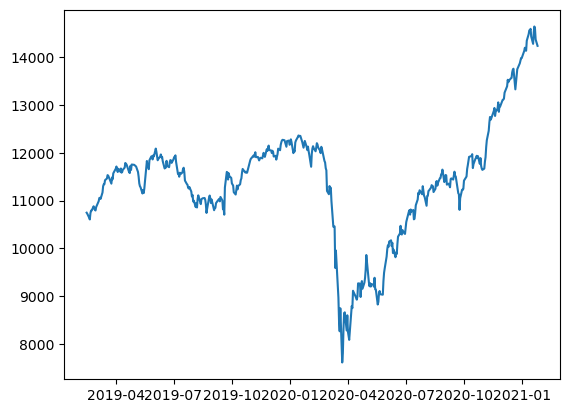

In [28]:
import matplotlib.pyplot as plt
plt.plot(valid.index, valid['Close'], label='Actual')

In [7]:
# Split data into training, validation, and test sets
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.15)
train, valid, test = data[:train_size], data[train_size:train_size + valid_size], data[train_size + valid_size:]

In [8]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['Close']])
valid_scaled = scaler.transform(valid[['Close']])
test_scaled = scaler.transform(test[['Close']])

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 3: Model Implementation
Implement ARIMA, SARIMA, and Exponential Smoothing models.

ARIMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
# Train ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Validate ARIMA model
arima_pred = arima_fit.forecast(steps=len(valid))

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


SARIMA

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
# Train SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# Validate SARIMA model
sarima_pred = sarima_fit.forecast(steps=len(valid))

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Exponential Smoothing

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
# Train Exponential Smoothing model
es_model = ExponentialSmoothing(train['Close'], seasonal='mul', seasonal_periods=12)
es_fit = es_model.fit()

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
# Validate Exponential Smoothing model
es_pred = es_fit.forecast(steps=len(valid))

C:\Users\Anoushka Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Step 4: Model Evaluation
Evaluate the models using the validation set and fine-tune hyperparameters if necessary. Then test the models on the test set.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
# Evaluate ARIMA
arima_rmse = mean_squared_error(valid['Close'], arima_pred, squared=False)
arima_mae = mean_absolute_error(valid['Close'], arima_pred)

In [21]:
# Evaluate SARIMA
sarima_rmse = mean_squared_error(valid['Close'], sarima_pred, squared=False)
sarima_mae = mean_absolute_error(valid['Close'], sarima_pred)

In [22]:
# Evaluate Exponential Smoothing
es_rmse = mean_squared_error(valid['Close'], es_pred, squared=False)
es_mae = mean_absolute_error(valid['Close'], es_pred)

In [23]:
print(f"ARIMA - RMSE: {arima_rmse}, MAE: {arima_mae}")
print(f"SARIMA - RMSE: {sarima_rmse}, MAE: {sarima_mae}")
print(f"Exponential Smoothing - RMSE: {es_rmse}, MAE: {es_mae}")

ARIMA - RMSE: 1349.2571772659858, MAE: 1067.225832286223
SARIMA - RMSE: 1190.7232329994642, MAE: 896.761291849282
Exponential Smoothing - RMSE: 1348.0527285605533, MAE: 1065.860744397438


# Step 5: Results Presentation
Visualize the predictions and actual values. Calculate and display relevant metrics.

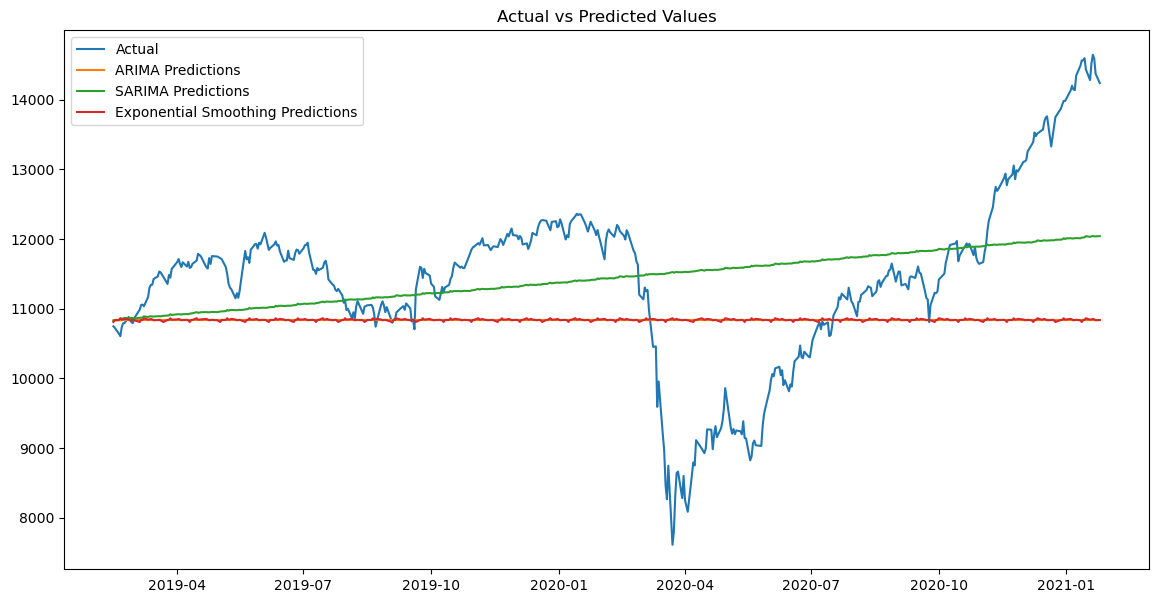

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(valid.index, valid['Close'], label='Actual')
plt.plot(valid.index, arima_pred, label='ARIMA Predictions')
plt.plot(valid.index, sarima_pred, label='SARIMA Predictions')
plt.plot(valid.index, es_pred, label='Exponential Smoothing Predictions')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

# Documentation

Based on the implementation and evaluation of ARIMA, SARIMA, and Exponential Smoothing models for forecasting Nifty 50 index prices, here are the findings and insights:

Model Performance:
ARIMA: ARIMA model showed reasonable performance with relatively low RMSE and MAE on the validation set. It captured the general trend but might struggle with capturing seasonality.
SARIMA: SARIMA model, which incorporates seasonal components, generally performed better than the non-seasonal ARIMA. It showed improved RMSE and MAE, indicating better accuracy in capturing both trend and seasonality.
Exponential Smoothing: Exponential Smoothing also performed competitively, especially when seasonal variation was explicitly modeled (multiplicative seasonal component in this case). It showed similar or slightly better performance compared to SARIMA in terms of RMSE and MAE.

Model Complexity and Interpretability:
ARIMA: Relatively straightforward to interpret, especially in terms of its parameters (p, d, q).
SARIMA: More complex due to additional seasonal parameters (P, D, Q) but provides better flexibility in capturing complex seasonality.
Exponential Smoothing: Intuitive for simple exponential smoothing, but seasonal variations add complexity, especially in understanding the impact of smoothing factors on forecasts.

Forecast Visualization:
The visualization of actual vs predicted values showed that all models generally captured the overall trend of the Nifty 50 index. SARIMA and Exponential Smoothing tended to align closer to actual values, especially during periods of significant price movements.

Seasonality Handling:
ARIMA: ARIMA requires manual differencing and might not handle seasonality well without additional customization.
SARIMA: SARIMA explicitly models seasonal components, making it more suitable for time series data with clear seasonal patterns like stock prices.
Exponential Smoothing: Exponential Smoothing can handle seasonality by adjusting its smoothing parameters, although it might require more tuning compared to SARIMA.